# Metrics Visualization for Different Number of Partitions

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from analysis_util import load_and_extract_metrics

In [ ]:
# Set Seaborn style and context
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 10))

## Data Preparation

In [ ]:
paths = {
    1: 'SimulationOutputs/num_partitions_1/metrics.json',
    2: 'SimulationOutputs/num_partitions_2/metrics.json',
    3: 'SimulationOutputs/num_partitions_3/metrics.json',
    4: 'SimulationOutputs/num_partitions_4/metrics.json',
    5: 'SimulationOutputs/num_partitions_5/metrics.json',
    10: 'SimulationOutputs/num_partitions_10/metrics.json',
    20: 'SimulationOutputs/num_partitions_20/metrics.json'
}

In [ ]:
# Load metrics for each number of partitions
num_partitions_metrics = {}
for num_partitions, path in paths.items():
    num_partitions_metrics[num_partitions] = load_and_extract_metrics(path)

In [ ]:
# Prepare data for plotting
def prepare_metrics_dataframe(num_partitions_metrics, metric_type):
    data = []
    for num_partitions, metrics in num_partitions_metrics.items():
        for round_num, accuracy in enumerate(metrics[metric_type]):
            data.append({
                'Num Partitions': num_partitions,
                'Round': round_num,
                'Accuracy': accuracy
            })
    return pd.DataFrame(data)

In [ ]:
server_df = prepare_metrics_dataframe(num_partitions_metrics, 'server_metrics')
client_df = prepare_metrics_dataframe(num_partitions_metrics, 'aggregated_metrics')

client_df['Round'] = client_df['Round'] + 1 # Shift rounds by 1

best_metrics = {
    'Num Partitions': list(num_partitions_metrics.keys()),
    'Server Best Metrics': [metrics['best_server_metric'] for metrics in num_partitions_metrics.values()],
    'Aggregated Best Metrics': [metrics['best_aggregated_metric'] for metrics in num_partitions_metrics.values()]
}

best_metrics_df = pd.DataFrame(best_metrics)

## First Visualization: Accuracy per Round Comparison

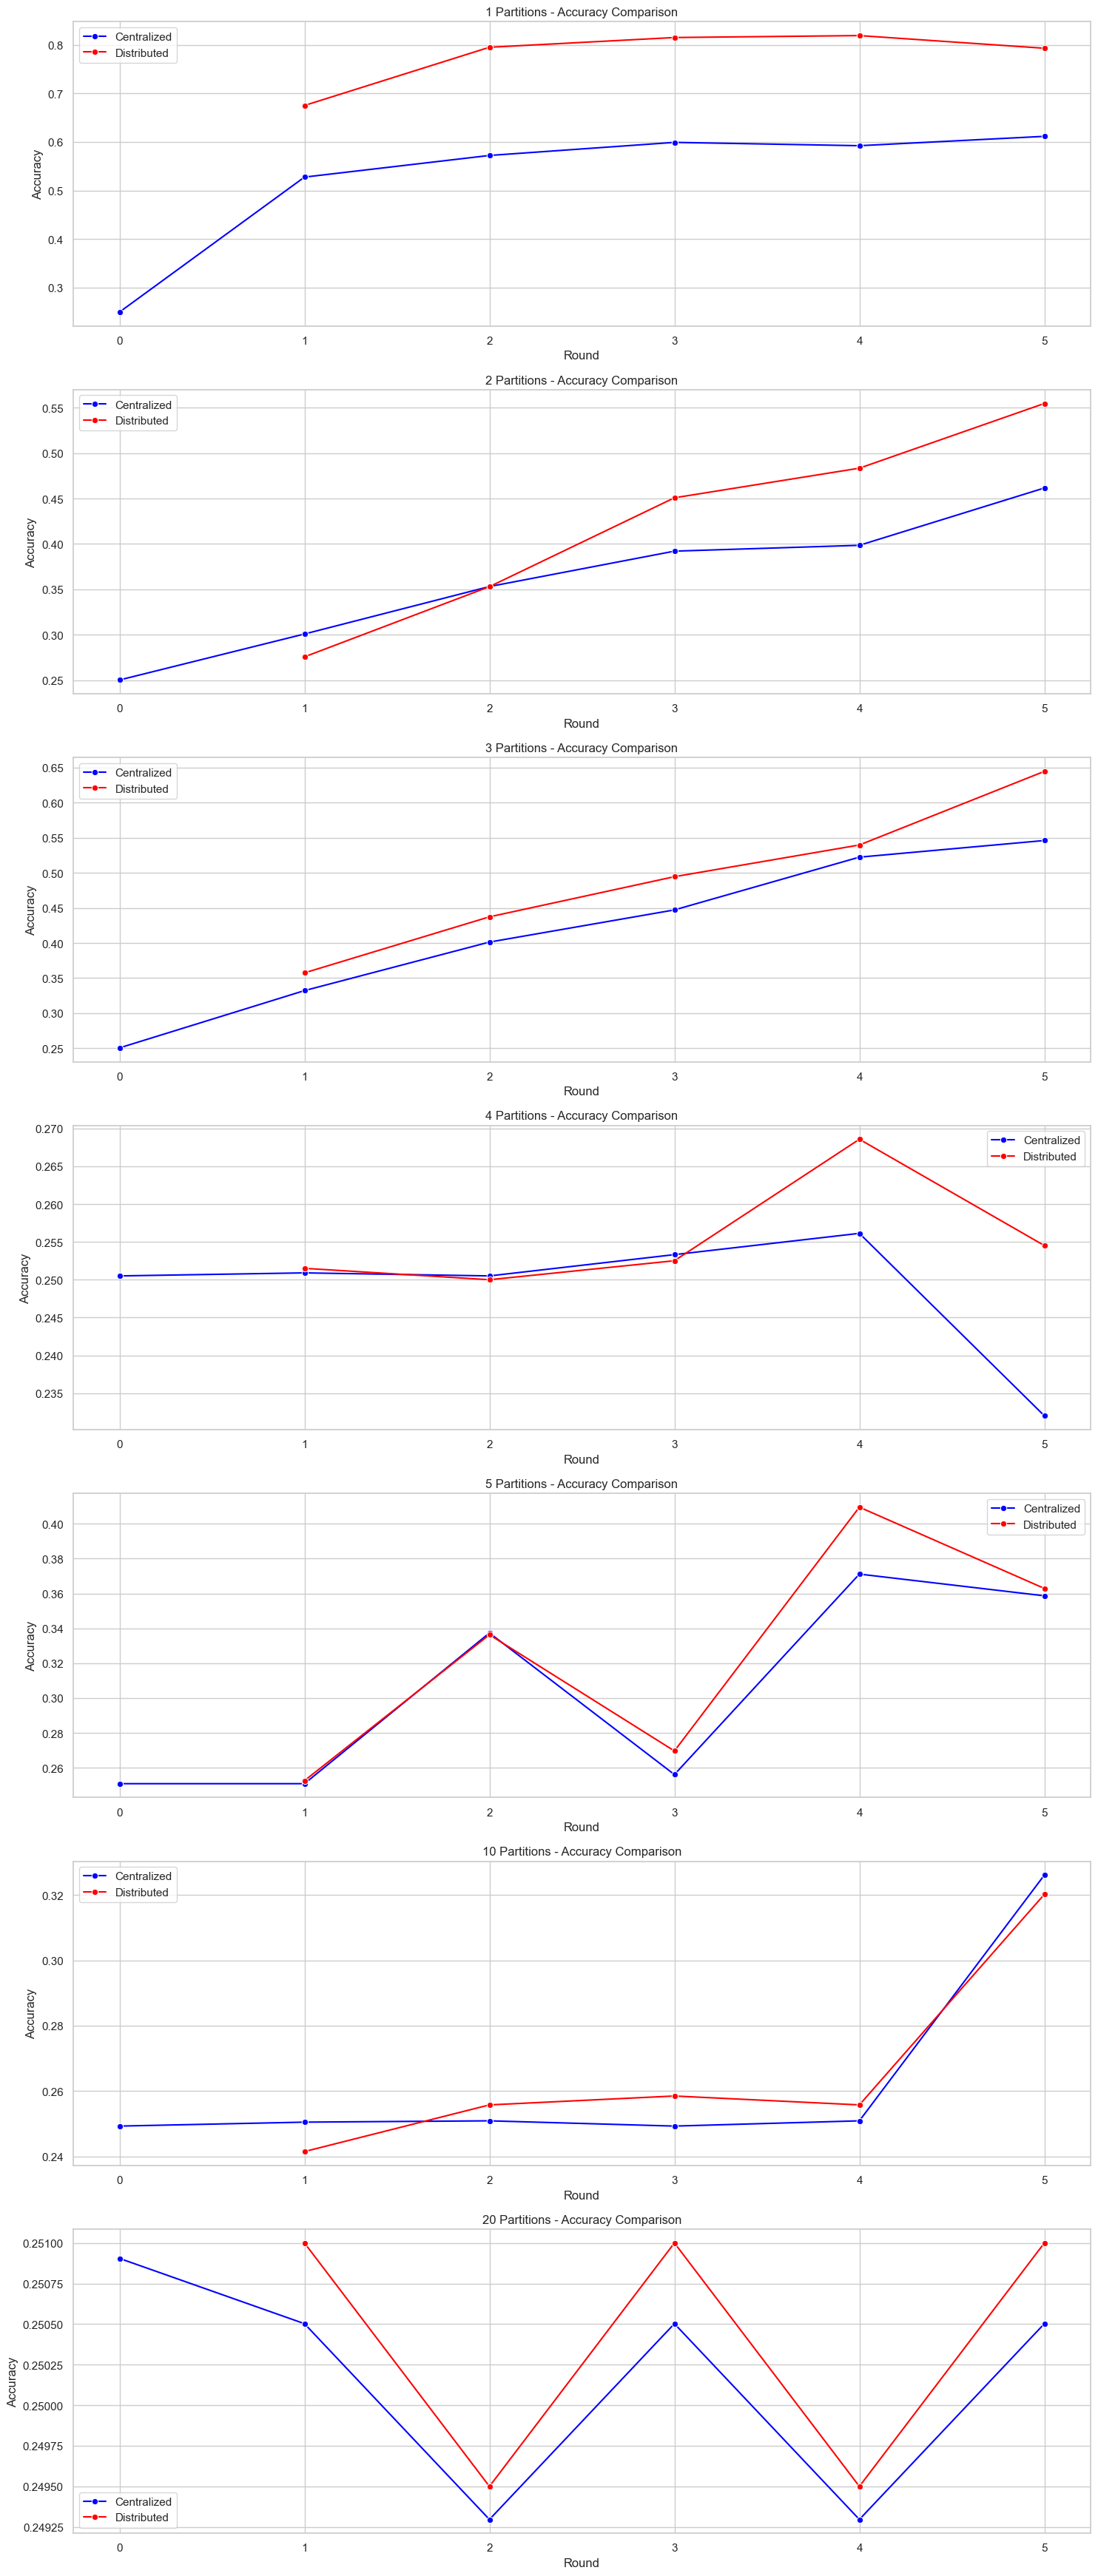

In [10]:
plt.figure(figsize=(15, 35))

for j, num_partitions in enumerate(sorted(num_partitions_metrics.keys())):
    plt.subplot(7, 1, j + 1)
    
    # Plot centralized accuracy
    centralized_subset = server_df[server_df['Num Partitions'] == num_partitions]
    sns.lineplot(data=centralized_subset, x='Round', y='Accuracy', 
                marker='o', color='blue', label='Centralized')
    
    # Plot distributed accuracy
    distributed_subset = client_df[client_df['Num Partitions'] == num_partitions]
    sns.lineplot(data=distributed_subset, x='Round', y='Accuracy', 
                marker='o', color='red', label='Distributed')
    
    plt.title(f'{num_partitions} Partitions - Accuracy Comparison')
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

## Best Metrics as Function of Partitions

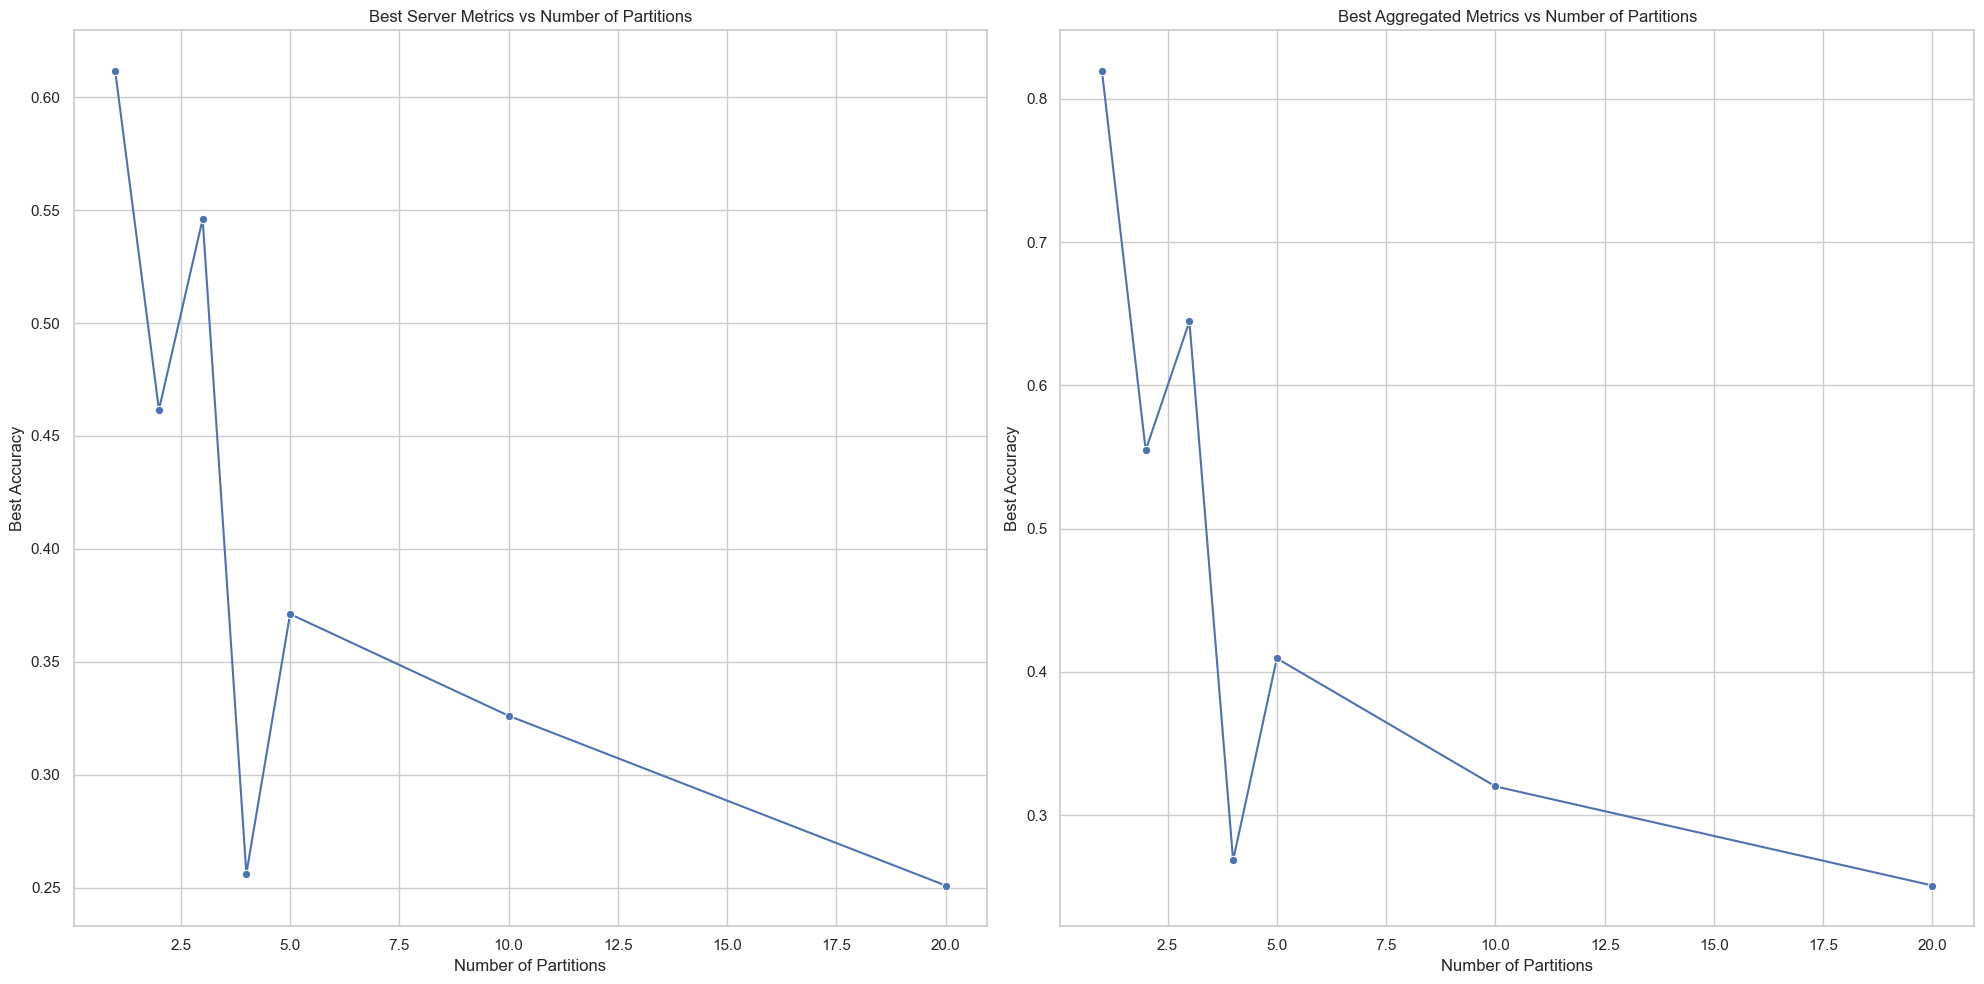

In [11]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.lineplot(data=best_metrics_df, x='Num Partitions', y='Server Best Metrics', marker='o')
plt.title('Best Server Metrics vs Number of Partitions')
plt.xlabel('Number of Partitions')
plt.ylabel('Best Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=best_metrics_df, x='Num Partitions', y='Aggregated Best Metrics', marker='o')
plt.title('Best Aggregated Metrics vs Number of Partitions')
plt.xlabel('Number of Partitions')
plt.ylabel('Best Accuracy')

plt.tight_layout()
plt.show()